In [3]:
import numpy as np
import matplotlib.pyplot as plt

# I. Расчет периода решеток

In [207]:
H = 1.2 # расстояние от решетки до экрана, м.
lambda_wave = 532 / 10**9 # м.
grid_nums = np.array([1, 2, 3, 4, 5])
image_period = np.array([30, 22.5, 12, 5, 3.7]) / 1000  # период изображения, м.
angles = image_period / H # приближенные диффракционные углы
real_periods = lambda_wave / angles # период диффракц. решетки, м.

In [208]:
real_periods * 1000

array([0.02128   , 0.02837333, 0.0532    , 0.12768   , 0.17254054])

## строим табличку для латеха

In [61]:
# период изображения, угол, период решетки, все в мм.
print('''
\\begin{table}[h]
\\centering
\\begin{tabular}{|c|c|c|}
\\hline ''')
print("Номер решетки & Период изображения, мм. & Период решетки, мм. \\\ \\hline")

for grid_num, img_period, real_period in zip(grid_nums, image_period, real_periods):
    print(f"{grid_num} & {(img_period * 1000):.1f} & {(real_period * 1000):.4f} \\\ \\hline")

print('''
\end{tabular}
\caption{Результаты вычислений периодов решеток по картине спектра}
\label{tabl:periods}
\end{table}
''')




\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|}
\hline 
Номер решетки & Период изображения, мм. & Период решетки, мм. \\ \hline
1 & 30.0 & 0.0213 \\ \hline
2 & 22.5 & 0.0284 \\ \hline
3 & 12.0 & 0.0532 \\ \hline
4 & 5.0 & 0.1277 \\ \hline
5 & 3.7 & 0.1725 \\ \hline

\end{tabular}
\caption{Результаты вычислений периодов решеток по картине спектра}
\label{tabl:periods}
\end{table}



# II. Расчет периода решеток через увеличение микроскопа

In [73]:
# Расстояния с чертежа в метрах

a1 = 190 / 1000
a2 = 25 / 1000
b1 = 512 / 1000 - a2
b2 = 775 / 1000

G = b1*b2 / (a1 * a2) # увеличение микроскопа

image_periods_microscope = np.array([1, 2, 3.3, 6, 9]) / 1000 # периоды изображений через микроском, м.

real_periods_microscope = image_periods_microscope / G # периоды сеток, м.

## строим табличку для латеха

In [74]:
# период изображения, угол, период решетки, все в мм.
print('''
\\begin{table}[h]
\\centering
\\begin{tabular}{|c|c|c|}
\\hline ''')
print("Номер решетки & Период изображения, мм. & Период решетки, мм. \\\ \\hline")

for grid_num, img_period, real_period in zip(grid_nums, image_periods_microscope, real_periods_microscope):
    print(f"{grid_num} & {(img_period * 1000):.1f} & {(real_period * 1000):.4f} \\\ \\hline")

print('''
\end{tabular}
\caption{Результаты вычислений периодов решеток по увеличенному изображению}
\label{tabl:periods_microscope}
\end{table}
''')



\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|}
\hline 
Номер решетки & Период изображения, мм. & Период решетки, мм. \\ \hline
1 & 1.0 & 0.0126 \\ \hline
2 & 2.0 & 0.0252 \\ \hline
3 & 3.3 & 0.0415 \\ \hline
4 & 6.0 & 0.0755 \\ \hline
5 & 9.0 & 0.1133 \\ \hline

\end{tabular}
\caption{Результаты вычислений периодов решеток по увеличенному изображению}
\label{tabl:periods_microscope}
\end{table}



# III. Определение периода решеток с помощью критерия Риэля.

In [179]:
min_diaphragmas = np.array([4, 4, 2.55, 1.6, 1.1]) / 1000 # наименьшие размеры диафрагмы для каждой решетки, м.
focus = 110 / 1000 # фокусное расстояние линзы, м.

periods_riel = (2 * focus * lambda_wave) / min_diaphragmas
periods_riel * 1000

array([0.02926   , 0.02926   , 0.04589804, 0.07315   , 0.1064    ])

## строим табличку для латеха

In [113]:
# период изображения, угол, период решетки, все в мм.
print('''
\\begin{table}[h]
\\centering
\\begin{tabular}{|c|c|c|}
\\hline ''')
print("Номер решетки & Минимальный размер диафрагмы, мм. & Период решетки, мм. \\\ \\hline")

for grid_num, img_period, real_period in zip(grid_nums, min_diaphragmas, real_periods_microscope):
    print(f"{grid_num} & {(img_period * 1000):.1f} & {(real_period * 1000):.4f} \\\ \\hline")

print('''
\end{tabular}
\caption{Результаты вычислений периодов решеток по критерию Риэля}
\label{tabl:periods_riel}
\end{table}
''')



\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|}
\hline 
Номер решетки & Минимальный размер диафрагмы, мм. & Период решетки, мм. \\ \hline
1 & 4.0 & 0.0126 \\ \hline
2 & 4.0 & 0.0252 \\ \hline
3 & 2.5 & 0.0415 \\ \hline
4 & 1.6 & 0.0755 \\ \hline
5 & 1.1 & 0.1133 \\ \hline

\end{tabular}
\caption{Результаты вычислений периодов решеток по критерию Риэля}
\label{tabl:periods_riel}
\end{table}



# IV. Пространственная мультипликация

In [ ]:
d_horisontal = 12 / 1000 # период изображения решетки при горизонтальном расположении щели 
d_vertical   = 12 / 1000 # период изображения решетки при вертикальном расположении щели 
d_diagonal   = 8  / 1000 # период изображения решетки при диагональном (45 градусов) расположении щели 



# V. Проверяем теорию Аббе
Для ее проверки построим график d = f(1 / D) где d взято из 1-го пункта 

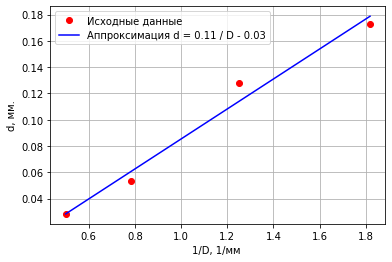

In [210]:
import numpy as np
import matplotlib.pyplot as plt

# Данные по D и d
D = min_diaphragmas[1:] * 1000 / 2 # оно не сходится ровно в 2 раза, я где-то видимо ошибся (возможно в опыте использовал линзу с фокусом 25), думать буду потом, а пока так.
d = real_periods[1:] * 1000

# Переводим D в 1/D
invD = 1 / D

# Оценка коэффициентов методом наименьших квадратов
a, b = np.polyfit(invD, d, 1)

# Вычисление приближенных значений d по формуле d = f(1/D) = a * 1/D + b
d_approx = a * invD + b

# Вычисление точек для построения графика
min_D = np.min(D)
max_D = np.max(D)
x = np.linspace(1 / max_D, 1 / min_D, 100)
y = a * x + b

# Построение графика
plt.plot(invD, d, 'ro', label='Исходные данные')
plt.plot(x, y, 'b-', label=f'Аппроксимация d = {a:.2f} / D {"+" if b > 0 else "-"} {abs(b):.2f}')
plt.xlabel('1/D, 1/мм ')
plt.ylabel('d, мм.')
plt.legend()
plt.grid(which="both")
plt.savefig("abbe_graph.png")
plt.show()


Посчитаем экспериментальный и точный коэффициенты

In [211]:
a

0.1140822315932863

In [180]:
2 * focus * lambda_wave * 1e6

0.11704